## Stuart Harley

### Machine Learning Week 7 Problem Set

# Different Feature Spaces for the same observations.

In [14]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in a wine dataset. This dataset has 13 different features.

In [6]:
wine_data = load_wine()
wine_data = pd.DataFrame(data=np.c_[wine_data['data'], wine_data['target']],\
                         columns=wine_data['feature_names'] + ['target'])

In [7]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


### Because there are 13 different features for each observation, there are 78 different combinations of features assuming we are only using 2 features in our model.

### Below I plot 4 possible features spaces.

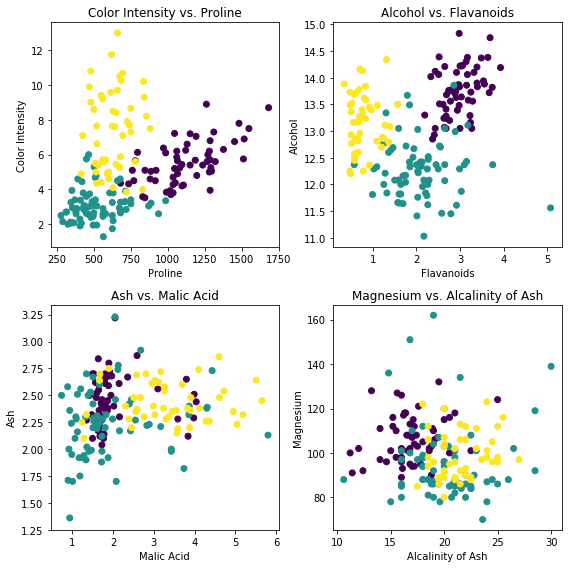

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
axes[0,0].scatter(wine_data['proline'], wine_data['color_intensity'], c=wine_data['target'])
axes[0,0].set_xlabel('Proline')
axes[0,0].set_ylabel('Color Intensity')
axes[0,0].set_title('Color Intensity vs. Proline')
axes[0,1].scatter(wine_data['flavanoids'], wine_data['alcohol'], c=wine_data['target'])
axes[0,1].set_xlabel('Flavanoids')
axes[0,1].set_ylabel('Alcohol')
axes[0,1].set_title('Alcohol vs. Flavanoids')
axes[1,0].scatter(wine_data['malic_acid'], wine_data['ash'], c=wine_data['target'])
axes[1,0].set_xlabel('Malic Acid')
axes[1,0].set_ylabel('Ash')
axes[1,0].set_title('Ash vs. Malic Acid')
axes[1,1].scatter(wine_data['alcalinity_of_ash'], wine_data['magnesium'], c=wine_data['target'])
axes[1,1].set_xlabel('Alcalinity of Ash')
axes[1,1].set_ylabel('Magnesium')
axes[1,1].set_title('Magnesium vs. Alcalinity of Ash')
fig.tight_layout();

### The point of using different feature spaces is to find one that divides up the classifications of observations into distiguishable sections. Therefore a model is able to create decision boundaries between the classes that accurately classify the observation.

### Therefore, from the above feature spaces, the color intensity and proline feature space, and the alcohal and flavanoids feature space are good at dividing up the classes while the others are not.

### Plotting all the 2d feature spaces

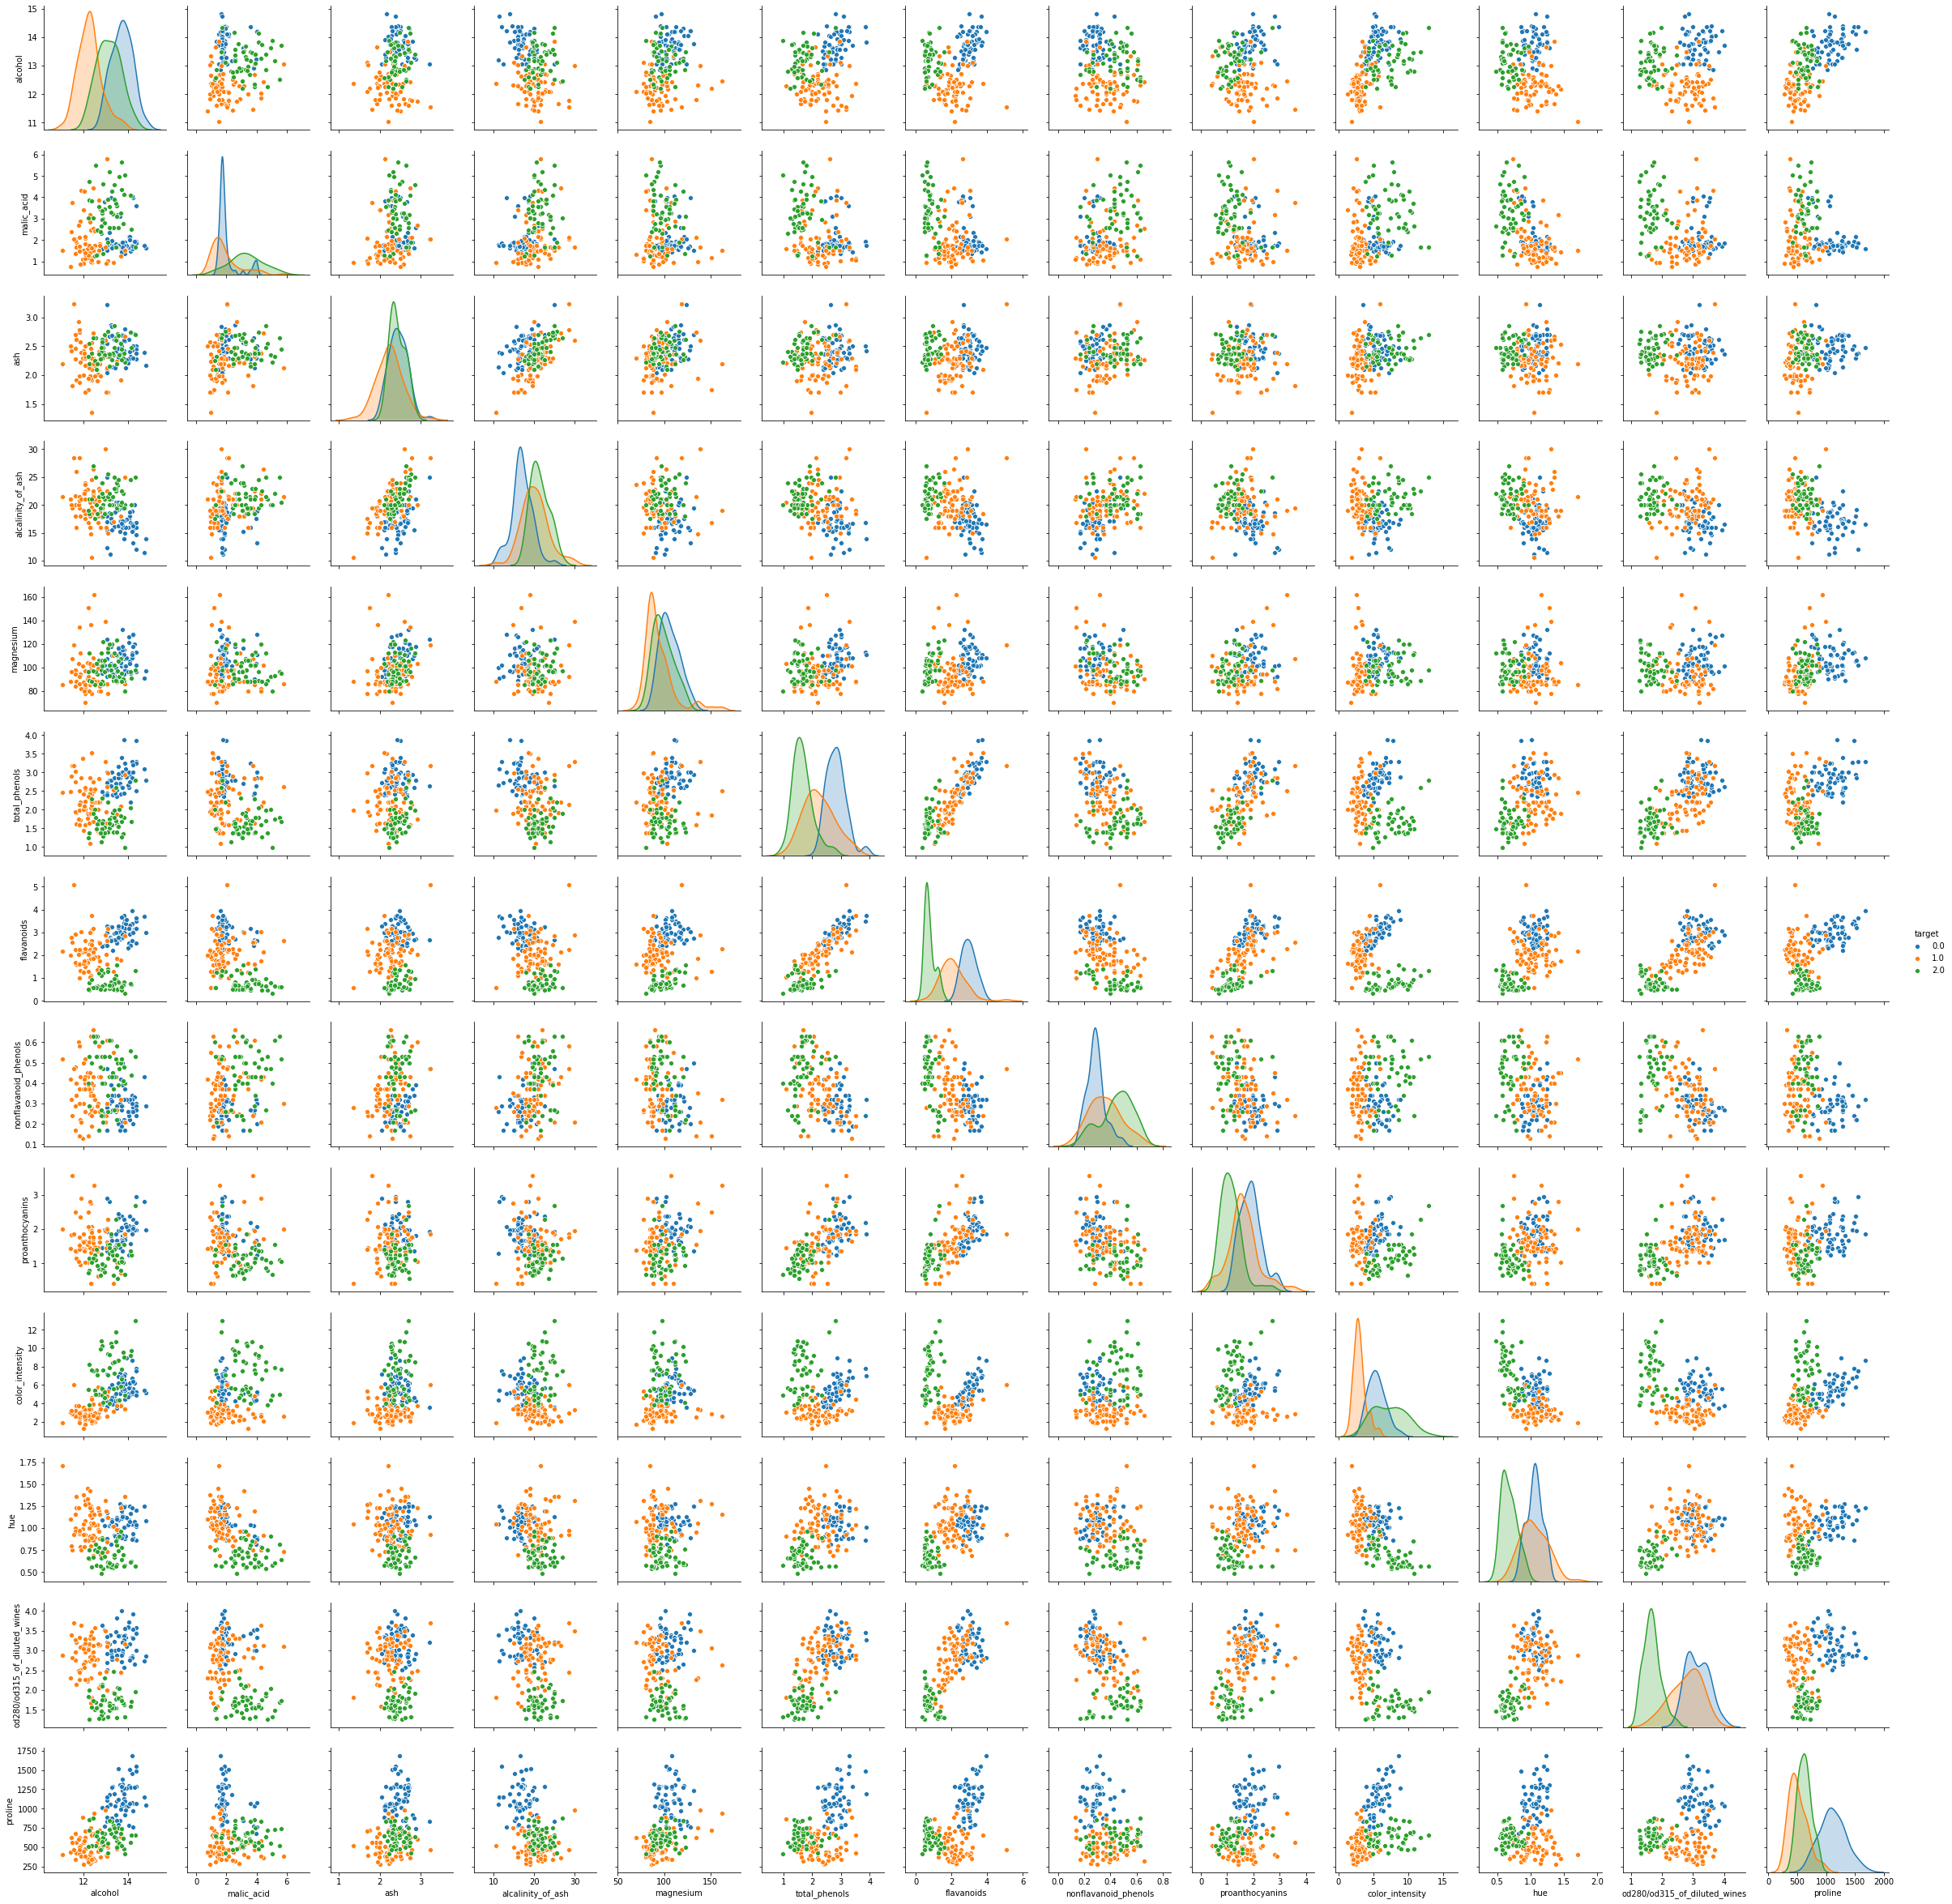

In [15]:
columns_to_plot = list(wine_data.columns)
columns_to_plot.remove('target')
sns.pairplot(wine_data, hue='target', vars=columns_to_plot);

### If we were to use more features, this number of possible feature spaces would grow, up to a certain point. It is a simple combination to determine the number of possible feature spaces.

### Feature Spaces = C(n, r)
n is the number of features per observation (13 for the wine data).

r is the number of features we want in the feature space.

### In order to create the best models, you want to use the feature space that best divides up the classes. In order to do this, you would have to examine every combination of features and determine which gives the best division. This feature space may have 2, 3, 4, etc features. 